In [ ]:
import os
import string
from datetime import datetime
from dateutil.parser import parse

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob


### **Collecting Info**

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
def filter(row):
    try:
      parse(row['date'])
      return True
    except:
      return False

In [ ]:
data = pd.read_csv('covidvaccine.csv')
db = data[['user_location', 'date','text']]
db = db.dropna(subset=['text', 'date'])
db = db[db.apply(filter, axis=1)]
db['date'] = pd.to_datetime(db['date'])

db.head()

FileNotFoundError: ignored

In [ ]:
data = pd.read_csv('vaccination_all_tweets.csv')
db2 = data[['user_location', 'date','text']]
db2 = db2.dropna(subset=['text', 'date'])
db2 = db2[db2.apply(filter, axis=1)]
db2['date'] = pd.to_datetime(db2['date'])

db2.head()

,user_location,date,text
0,"La Crescenta-Montrose, CA",2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...
1,"San Francisco, CA",2020-12-13 16:27:13,While the world has been on the wrong side of ...
2,Your Bed,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Vancouver, BC - Canada",2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're..."
4,NaN,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...


In [ ]:
db = pd.concat([db, db2], ignore_index = False)

In [ ]:
sia = SentimentIntensityAnalyzer()
compound = [sia.polarity_scores(tweet)['compound'] for tweet in db['text']]
db['sentiment'] = compound

In [ ]:
subjectivity = [TextBlob(text).sentiment.subjectivity for text in db['text']]
db['subjectivity'] = subjectivity

## **Sentimental Analysis**

In [ ]:
neg = db[db['sentiment'] <= -0.33]
neu = db[(db['sentiment'] > -0.33) & (db['sentiment'] < 0.33)]
pos = db[ db['sentiment'] >= 0.33]

In [ ]:
# neu.to_csv('neu.csv', encoding='utf-8', index=False)
# neg.to_csv('neg.csv', encoding='utf-8', index=False)
# pos.to_csv('pos.csv', encoding='utf-8', index=False)
# db.to_csv('full_data.csv', encoding='utf-8', index=False)

# from google.colab import files
# files.download('full_data.csv') 
# files.download('neu.csv') 
# files.download('neg.csv') 
# files.download('pos.csv') 

In [ ]:
plt.hist(compound)
plt.title('Sentimental Value Histogram')
plt.ylabel('Frquency')
plt.xlabel('Sentimental Value')
plt.axvline(x=0.33, color='k', linestyle='--')
plt.axvline(x=-0.33, color='k', linestyle='--')
plt.show()

NameError: ignored

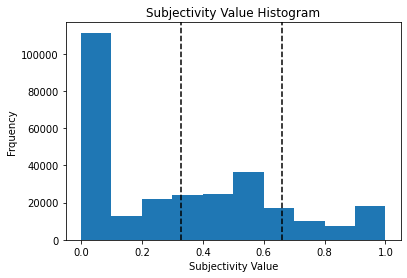

In [ ]:
plt.hist(subjectivity)
plt.title('Subjectivity Value Histogram')
plt.ylabel('Frquency')
plt.xlabel('Subjectivity Value')
plt.axvline(x=0.33, color='k', linestyle='--')
plt.axvline(x=0.66, color='k', linestyle='--')
plt.show()

# **Average monthly sentimental value**

In [ ]:
def get_average_sentimental(db):
  compound = [val for val in db['sentiment']]
  if len(compound) == 0:
    return 0
  return sum(compound)/len(compound)

In [ ]:
db_monthly = {n:g for n, g in db.groupby(pd.Grouper(key='date',freq='M'))}
month_average = [get_average_sentimental(db_monthly[month]) for month in db_monthly]
month = [time.to_pydatetime() for time in list(db_monthly.keys())]


In [ ]:
reliable_info = datetime(2020, 5, 18)
auto_detect = datetime(2020, 4, 1)
misinformation_label = datetime(2020, 5, 11)


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
fig.suptitle('Average Sentiment per month over time', fontsize=22)
ax.plot(month, month_average)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.axvline(x=reliable_info)
plt.axvline(x=auto_detect)
plt.axvline(x=misinformation_label)
_=plt.xticks(rotation=90)    


NameError: ignored

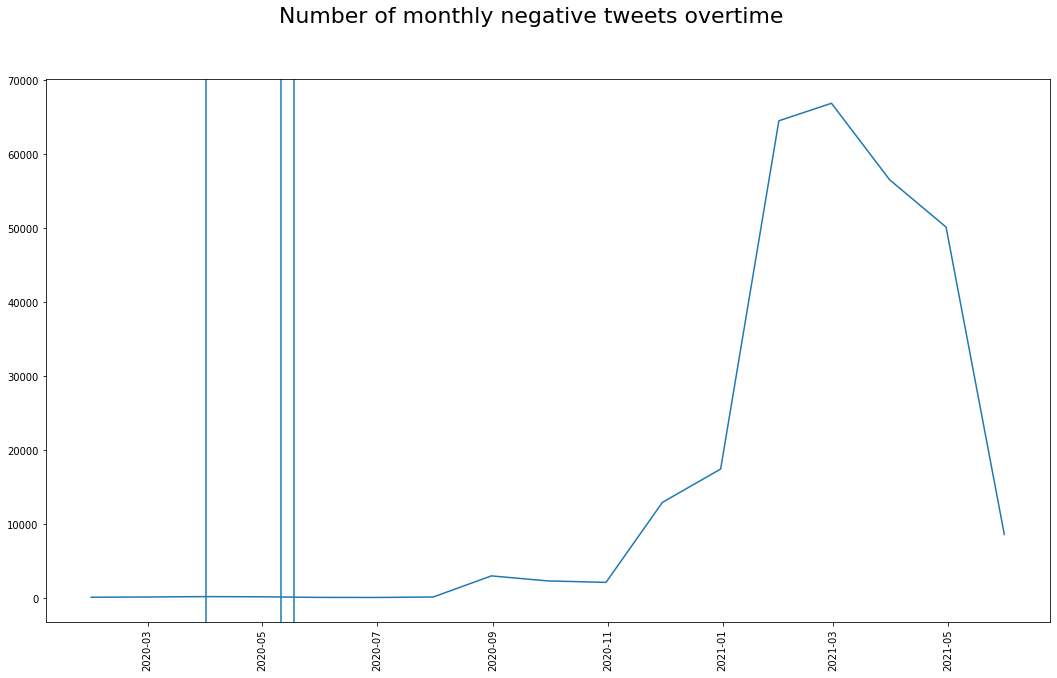

In [ ]:
month_num = [len(db) for db in list(db_monthly.values())]

fig, ax = plt.subplots()
fig.suptitle('Number of monthly negative tweets over time', fontsize=22)

fig.set_size_inches(18, 10)
ax.plot(month, month_num)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.axvline(x=reliable_info)
plt.axvline(x=auto_detect)
plt.axvline(x=misinformation_label)
_=plt.xticks(rotation=90)    


# **Negative Sentimental Analysis**

In [ ]:
dates = [time.to_pydatetime() for time in neg['date']]
sentimental = list(neg['sentiment'])

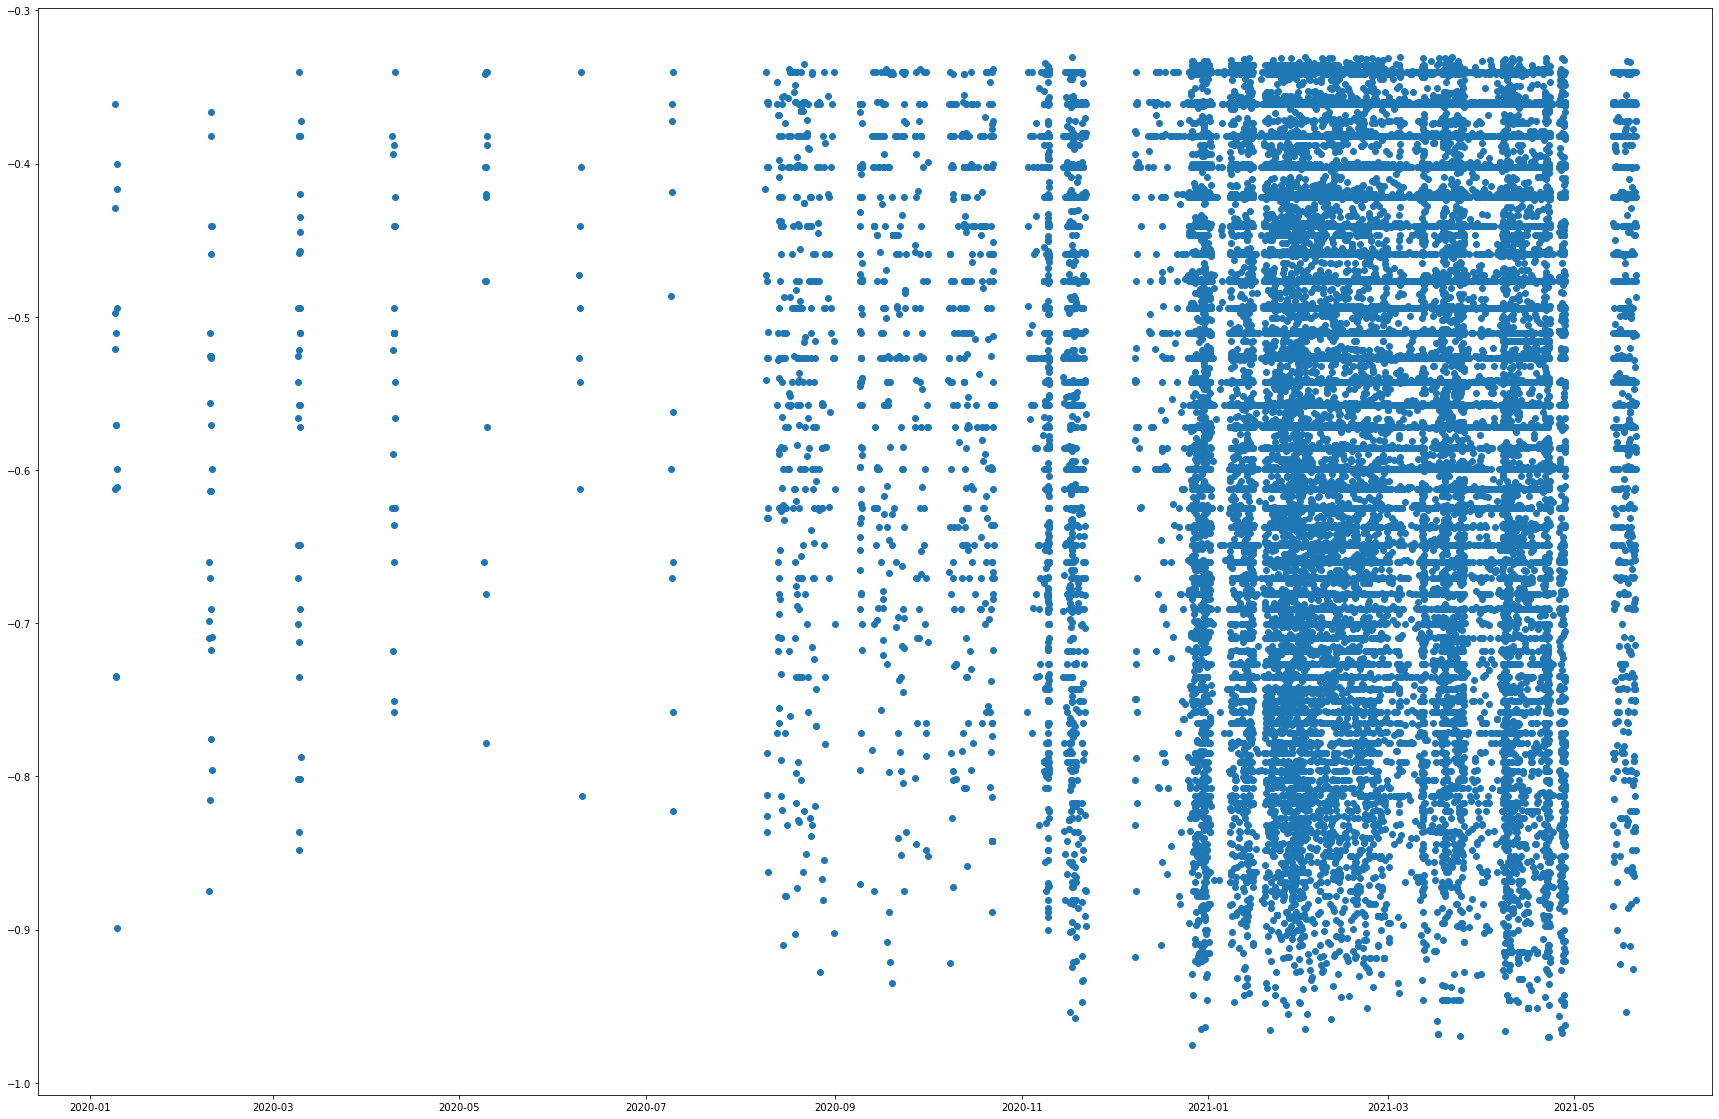

In [ ]:
plt.figure(figsize=(30,20)) 
plt.scatter(neg['date'].tolist(), neg['sentiment'])
plt.show()

In [ ]:
neg_monthly = {n:g for n, g in neg.groupby(pd.Grouper(key='date',freq='M'))}
neg_month_average = [get_average_sentimental(neg_monthly[month]) for month in neg_monthly]
month = [time.to_pydatetime() for time in list(neg_monthly.keys())]


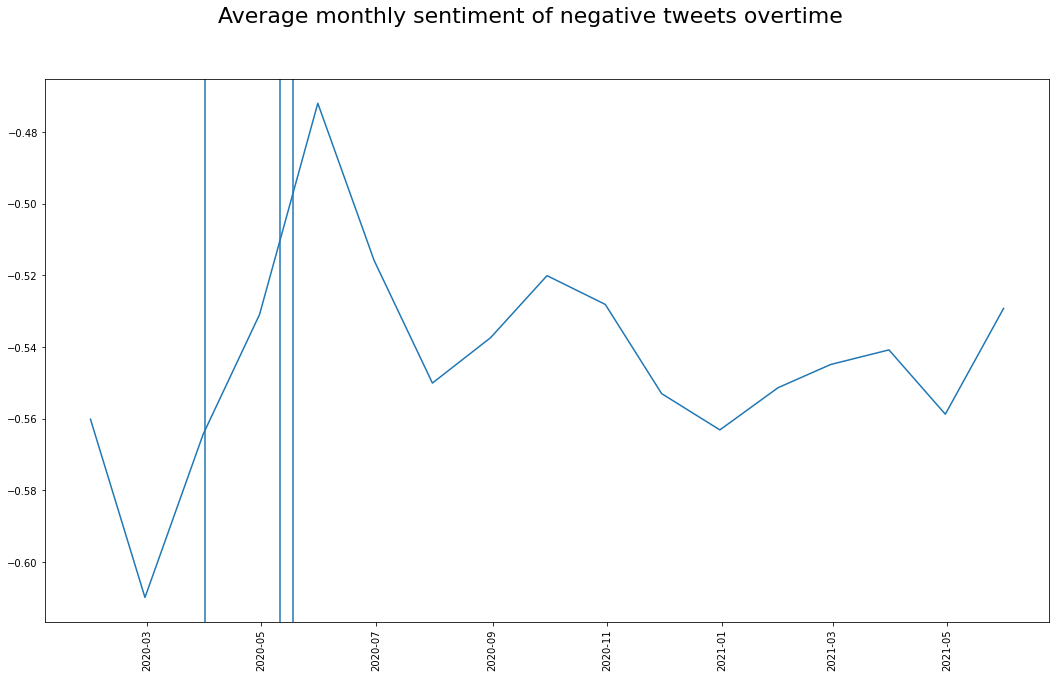

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
fig.suptitle('Average monthly sentiment of negative tweets overtime', fontsize=22)

ax.plot(month, neg_month_average)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.axvline(x=reliable_info)
plt.axvline(x=auto_detect)
plt.axvline(x=misinformation_label)
_=plt.xticks(rotation=90)    


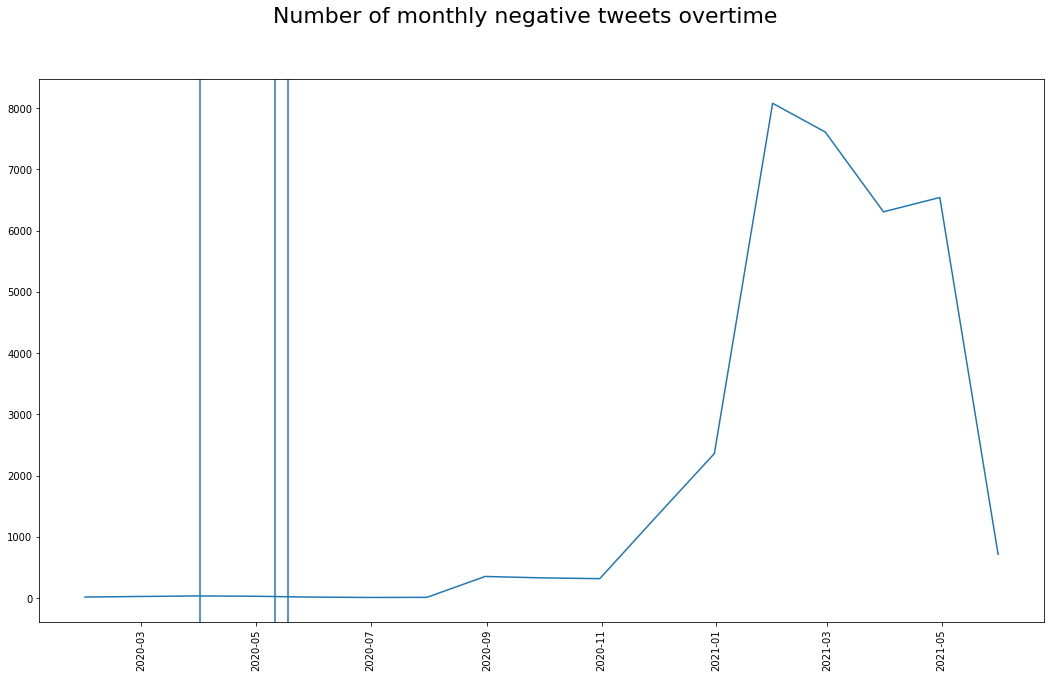

In [ ]:
neg_num = [len(db) for db in list(neg_monthly.values())]

fig, ax = plt.subplots()
fig.suptitle('Number of monthly negative tweets overtime', fontsize=22)

fig.set_size_inches(18, 10)
ax.plot(month, neg_num)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.axvline(x=reliable_info)
plt.axvline(x=auto_detect)
plt.axvline(x=misinformation_label)
_=plt.xticks(rotation=90)    


# **Positive Tweet**

In [ ]:
pos_monthly = {n:g for n, g in pos.groupby(pd.Grouper(key='date',freq='M'))}
pos_month_average = [get_average_sentimental(pos_monthly[month]) for month in pos_monthly]
month = [time.to_pydatetime() for time in list(pos_monthly.keys())]


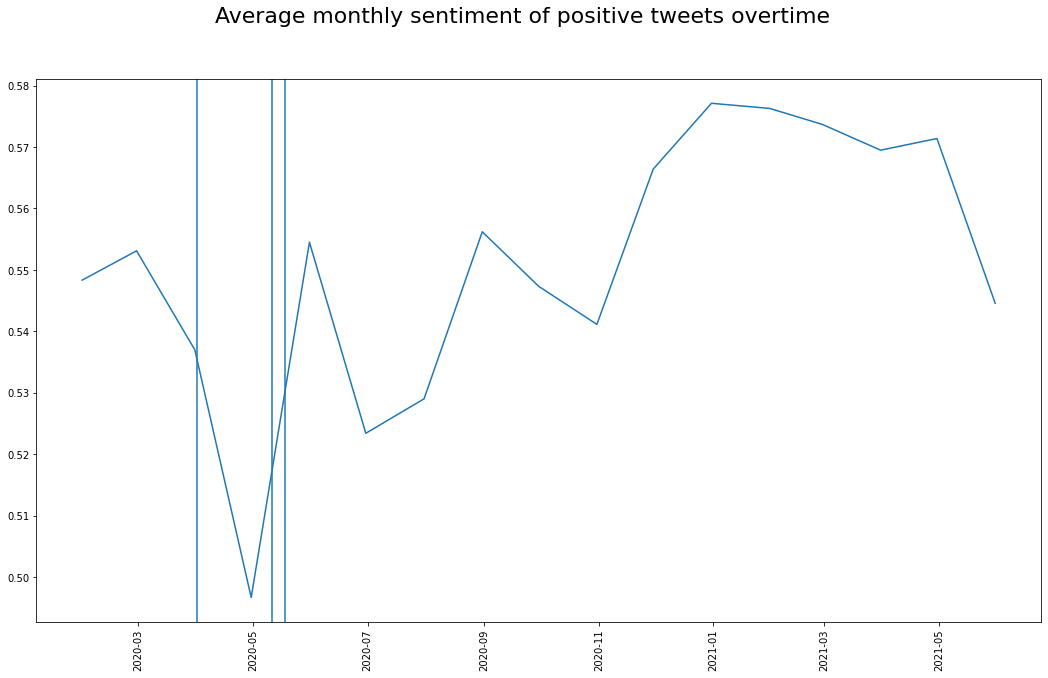

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
fig.suptitle('Average monthly sentiment of positive tweets overtime', fontsize=22)

ax.plot(month, pos_month_average)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.axvline(x=reliable_info)
plt.axvline(x=auto_detect)
plt.axvline(x=misinformation_label)
_=plt.xticks(rotation=90)    


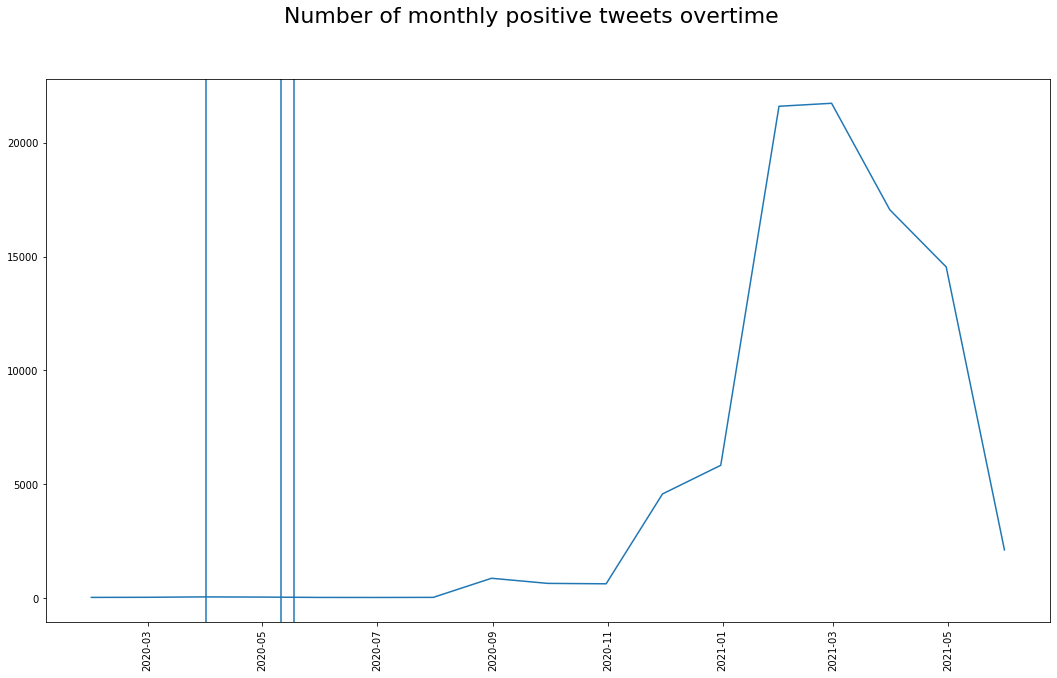

In [ ]:
pos_month_num = [len(db) for db in list(pos_monthly.values())]

fig, ax = plt.subplots()
fig.suptitle('Number of monthly positive tweets overtime', fontsize=22)

fig.set_size_inches(18, 10)
ax.plot(month, pos_month_num)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.axvline(x=reliable_info)
plt.axvline(x=auto_detect)
plt.axvline(x=misinformation_label)
_=plt.xticks(rotation=90)    


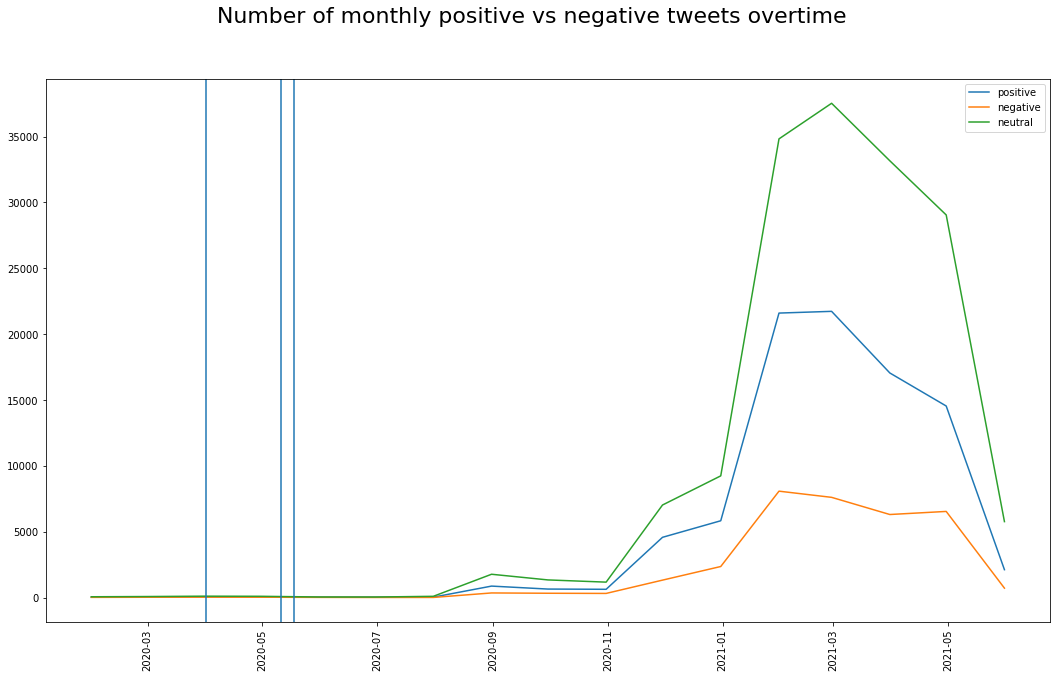

In [ ]:
neu_monthly = {n:g for n, g in neu.groupby(pd.Grouper(key='date',freq='M'))}
neu_month_num = [len(db.index) for db in list(neu_monthly.values())]

fig, ax = plt.subplots()
fig.suptitle('Number of monthly positive vs negative tweets overtime', fontsize=22)

fig.set_size_inches(18, 10)
ax.plot(month, pos_month_num, label='positive')
ax.plot(month, neg_num, label='negative')
ax.plot(month, neu_month_num, label='neutral')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.legend()

plt.axvline(x=reliable_info)
plt.axvline(x=auto_detect)
plt.axvline(x=misinformation_label)
_=plt.xticks(rotation=90)    


# **Hashtag**

In [ ]:
from collections import Counter

neghashtags = []
for text in neg['text']:
  text = text.lower()
  neghashtags += [tag.strip("#") for tag in text.split() if tag.startswith("#")]

for a, b in Counter(neghashtags).most_common(100):
  print(a, b)

In [ ]:
poshashtags = []
for text in pos['text']:
  text = text.lower()
  poshashtags += [tag.strip("#") for tag in text.split() if tag.startswith("#")]

for a, b in Counter(poshashtags).most_common(100):
  print(a, b)

In [ ]:
pos = set([a for a, x in Counter(poshashtags).most_common(50)])
neg = set([a for a, x in Counter(neghashtags).most_common(50)])
similarity = pos.intersection(neg)

print('Negative')
for a, b in Counter(neghashtags).most_common(50):
  if a not in similarity:
    print(a, b)

print('\nPositive')
for a, b in Counter(poshashtags).most_common(50):
  if a not in similarity:
    print(a, b)

Negative
eu 266
lockdown 258
trump 104
covidiots 92
biden 92
covid19. 92
uk 90
covid… 86
pandemic 82
corona 77
coronavirus… 71
mrna 68
trudeau 68

Positive
covidvaccine! 407
vaccineswork 287
science 226
vaccinessavelives 221
wearamask 219
thisisourshot 208
covid19india 207
covid19vaccination 196
1 185
bharatbiotech 180
covidvaccine: 178
coronavaccine 177
moderna… 173


# **Subjectivity Analysis**

In [ ]:
def average(lst):
  if len(lst) == 0:
    return 0
  return sum(lst)/len(lst)

In [ ]:
neg_monthly = {n:g for n, g in neg.groupby(pd.Grouper(key='date',freq='M'))}
month = [time.to_pydatetime() for time in list(neg_monthly.keys())]
neg_subjectivity = [average(db['subjectivity']) for db in list(neg_monthly.values())]

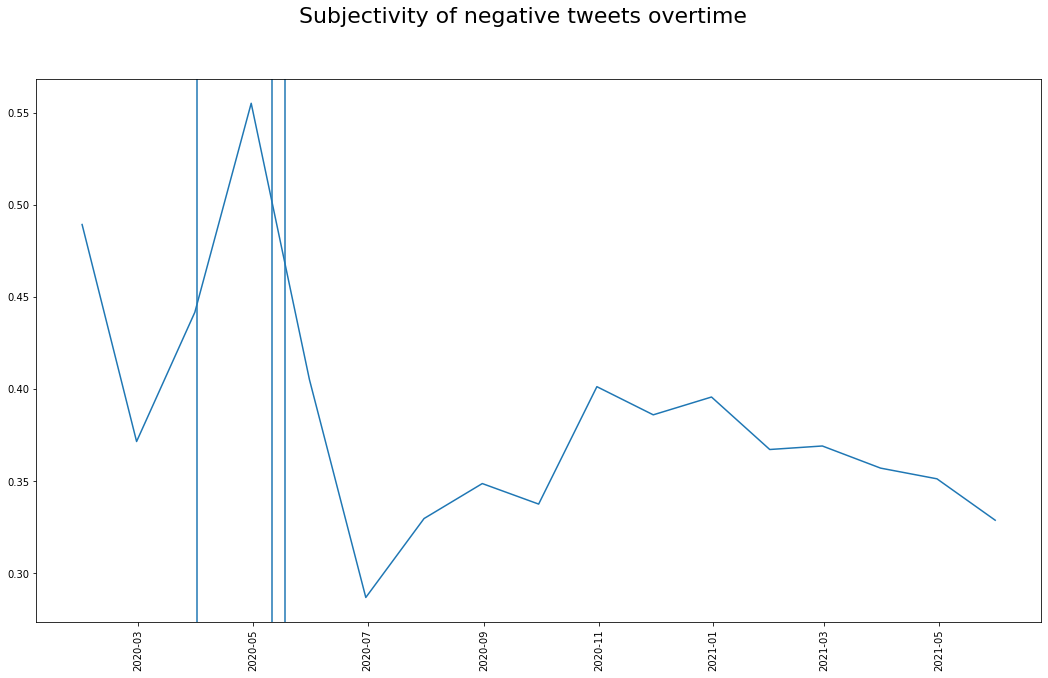

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
ax.plot(month, neg_subjectivity)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
fig.suptitle('Subjectivity of negative tweets overtime', fontsize=22)
plt.axvline(x=reliable_info)
plt.axvline(x=auto_detect)
plt.axvline(x=misinformation_label)
_=plt.xticks(rotation=90)    


In [ ]:
pos_monthly = {n:g for n, g in pos.groupby(pd.Grouper(key='date',freq='M'))}
month = [time.to_pydatetime() for time in list(pos_monthly.keys())]
pos_subjectivity = [average(db['subjectivity']) for db in list(pos_monthly.values())]

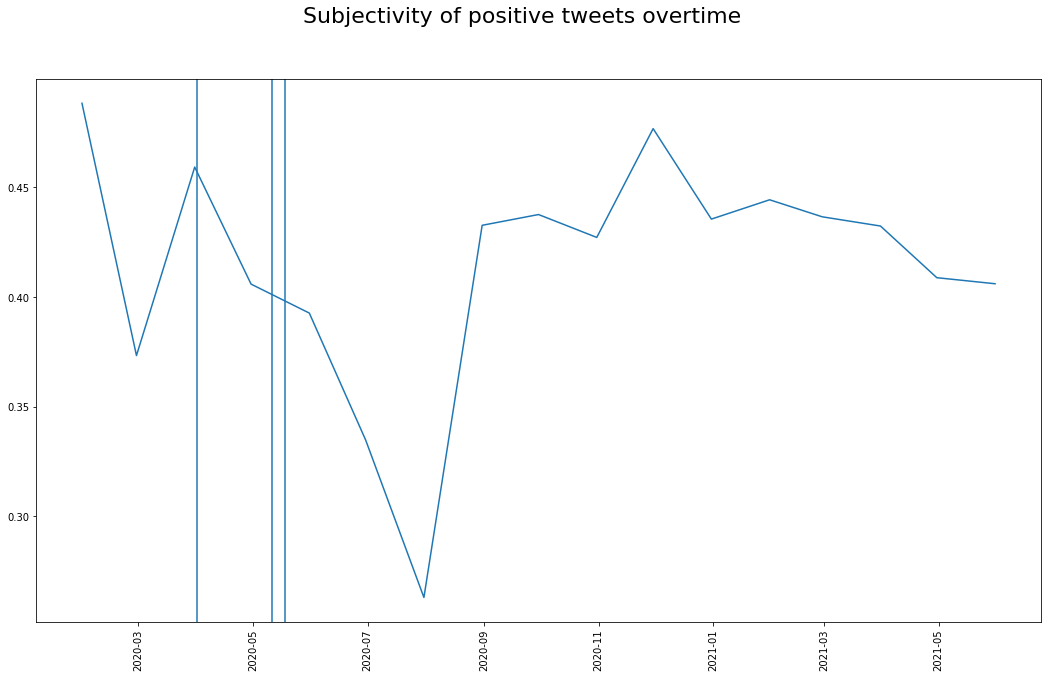

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
ax.plot(month, pos_subjectivity)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
fig.suptitle('Subjectivity of positive tweets overtime', fontsize=22)
plt.axvline(x=reliable_info)
plt.axvline(x=auto_detect)
plt.axvline(x=misinformation_label)
_=plt.xticks(rotation=90)    


In [ ]:
neu_monthly = {n:g for n, g in neu.groupby(pd.Grouper(key='date',freq='M'))}
month = [time.to_pydatetime() for time in list(neu_monthly.keys())]
neu_subjectivity = [average(db['subjectivity']) for db in list(neu_monthly.values())]

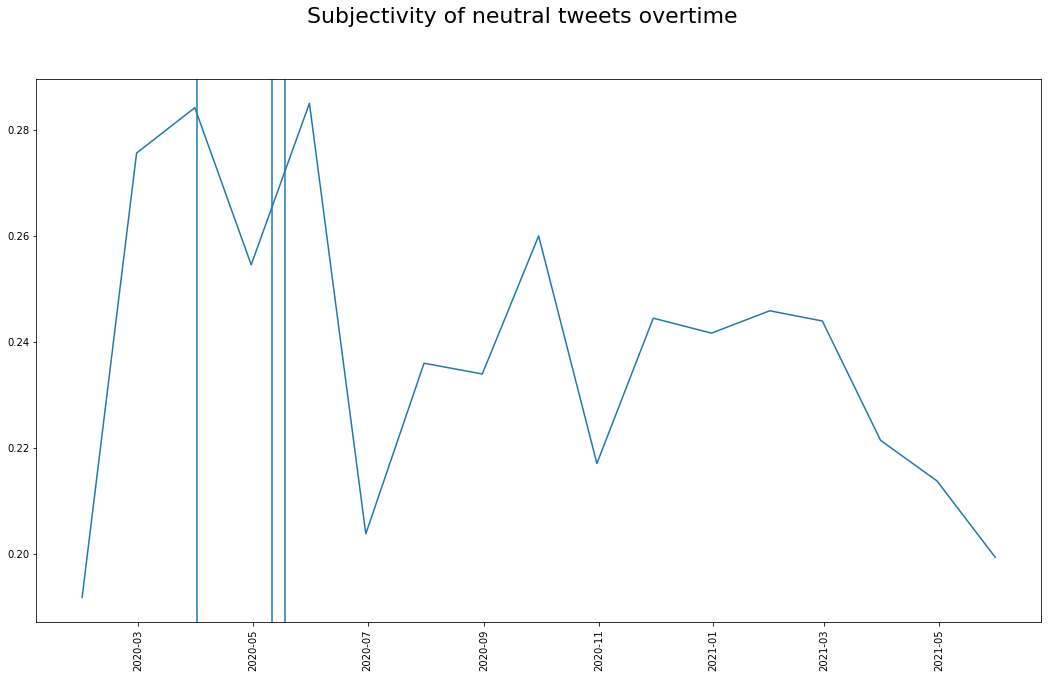

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
ax.plot(month, neu_subjectivity)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
fig.suptitle('Subjectivity of neutral tweets overtime', fontsize=22)
plt.axvline(x=reliable_info)
plt.axvline(x=auto_detect)
plt.axvline(x=misinformation_label)
_=plt.xticks(rotation=90)    


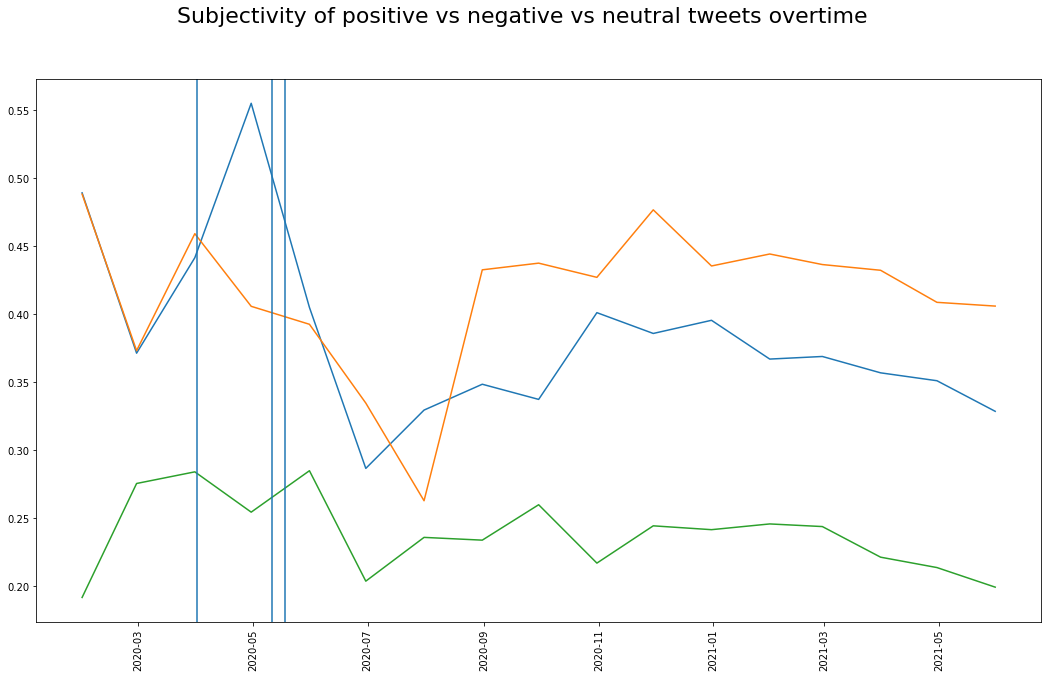

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
ax.plot(month, neg_subjectivity, label='negative')
ax.plot(month, pos_subjectivity, label='positive')
ax.plot(month, neu_subjectivity, label='neutral')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
fig.suptitle('Subjectivity of positive vs negative vs neutral tweets overtime', fontsize=22)
plt.axvline(x=reliable_info)
plt.axvline(x=auto_detect)
plt.axvline(x=misinformation_label)
_=plt.xticks(rotation=90)    


In [ ]:
db_monthly = {n:g for n, g in db.groupby(pd.Grouper(key='date',freq='M'))}
month = [time.to_pydatetime() for time in list(db_monthly.keys())]
db_subjectivity = [average(db['subjectivity']) for db in list(db_monthly.values())]

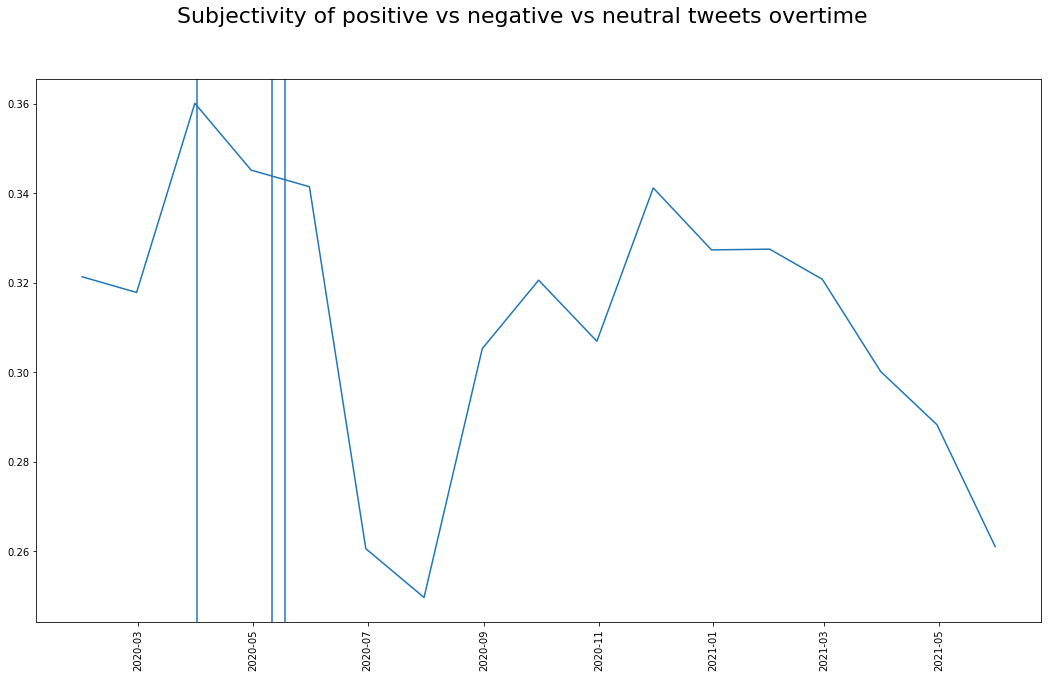

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
ax.plot(month, db_subjectivity, label='data')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
fig.suptitle('Subjectivity of whole database overtime', fontsize=22)
plt.axvline(x=reliable_info)
plt.axvline(x=auto_detect)
plt.axvline(x=misinformation_label)
_=plt.xticks(rotation=90)    
